In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 775 images belonging to 2 classes.


In [4]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.7646649  0.7372549  0.6745098 ]
  [0.73765355 0.7179318  0.6551867 ]
  [0.6987677  0.68685734 0.627961  ]
  ...
  [0.8134461  0.7404298  0.61960787]
  [0.8145046  0.7407826  0.61960787]
  [0.81556326 0.7411355  0.61960787]]

 [[0.764312   0.7372549  0.6745098 ]
  [0.7401235  0.7196961  0.656951  ]
  [0.70229626 0.6896802  0.630431  ]
  ...
  [0.82200414 0.74749434 0.6227668 ]
  [0.82270986 0.74820006 0.62311965]
  [0.8234156  0.7489058  0.6234725 ]]

 [[0.7639592  0.7372549  0.6745098 ]
  [0.7425935  0.72146034 0.65871525]
  [0.7058249  0.6925031  0.63290095]
  ...
  [0.8266725  0.75216264 0.6203864 ]
  [0.82702535 0.75251555 0.62003356]
  [0.8273782  0.7528684  0.6196807 ]]

 ...

 [[0.70232505 0.6474231  0.54154074]
  [0.70408934 0.6491874  0.54330504]
  [0.7058537  0.6509517  0.54506934]
  ...
  [0.8015572  0.75213397 0.6493945 ]
  [0.79106474 0.7486901  0.64128244]
  [0.72156864 0.68085945 0.5686275 ]]

 [[0.7219673  0.66706526 0.5611829 ]
  [0.72443724 0.6695353  0.56365293]


In [5]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 200 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 100 images belonging to 2 classes.


In [7]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=22,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=200

)

Epoch 1/200
22/22 [==============================] - 321s 15s/step - loss: 0.6633 - accuracy: 0.6333 - val_loss: 0.6660 - val_accuracy: 0.6719
Epoch 2/200
22/22 [==============================] - 18s 812ms/step - loss: 0.5982 - accuracy: 0.6377 - val_loss: 0.5299 - val_accuracy: 0.7396
Epoch 3/200
22/22 [==============================] - 18s 842ms/step - loss: 0.5263 - accuracy: 0.7703 - val_loss: 0.5022 - val_accuracy: 0.7500
Epoch 4/200
22/22 [==============================] - 19s 870ms/step - loss: 0.4317 - accuracy: 0.8233 - val_loss: 0.4790 - val_accuracy: 0.7812
Epoch 5/200
22/22 [==============================] - 18s 809ms/step - loss: 0.3966 - accuracy: 0.8292 - val_loss: 0.5050 - val_accuracy: 0.8021
Epoch 6/200
22/22 [==============================] - 19s 861ms/step - loss: 0.3837 - accuracy: 0.8439 - val_loss: 0.4652 - val_accuracy: 0.7812
Epoch 7/200
22/22 [==============================] - 18s 838ms/step - loss: 0.3514 - accuracy: 0.8748 - val_loss: 0.4411 - val_accuracy: 

In [16]:
scores = model.evaluate(test_generator)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

4/4 [==============================] - 2s 376ms/step - loss: 0.5099 - accuracy: 0.9100
Test Loss: 0.5098960995674133
Test Accuracy: 0.9100000262260437


In [17]:
scores

[0.5098960995674133, 0.9100000262260437]

In [18]:
history

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 200, 'steps': 22}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
class_names = list(train_generator.class_indices.keys())
class_names

['Lumpy Skin', 'Normal Skin']

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

200

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.6633078455924988,
 0.598152220249176,
 0.5263046026229858,
 0.4316984713077545,
 0.39656320214271545]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.671875,
 0.7395833134651184,
 0.75,
 0.78125,
 0.8020833134651184,
 0.78125,
 0.8020833134651184,
 0.8125,
 0.8177083134651184,
 0.7916666865348816,
 0.8125,
 0.8072916865348816,
 0.8229166865348816,
 0.765625,
 0.8125,
 0.796875,
 0.8177083134651184,
 0.8072916865348816,
 0.8229166865348816,
 0.84375,
 0.8072916865348816,
 0.8229166865348816,
 0.8541666865348816,
 0.796875,
 0.84375,
 0.8072916865348816,
 0.7864583134651184,
 0.8125,
 0.8125,
 0.8385416865348816,
 0.8177083134651184,
 0.8072916865348816,
 0.8645833134651184,
 0.8489583134651184,
 0.828125,
 0.8541666865348816,
 0.84375,
 0.8385416865348816,
 0.8020833134651184,
 0.8333333134651184,
 0.8229166865348816,
 0.8177083134651184,
 0.828125,
 0.8125,
 0.84375,
 0.828125,
 0.7708333134651184,
 0.8072916865348816,
 0.8697916865348816,
 0.8333333134651184,
 0.8333333134651184,
 0.84375,
 0.8385416865348816,
 0.8541666865348816,
 0.8489583134651184,
 0.84375,
 0.8229166865348816,
 0.8645833134651184,
 0.8489583134651184,
 0.85

In [28]:
acc

[0.6332842707633972,
 0.6377025246620178,
 0.7702503800392151,
 0.8232694864273071,
 0.8291605114936829,
 0.8438880443572998,
 0.8748158812522888,
 0.8630338907241821,
 0.8703976273536682,
 0.8630338907241821,
 0.8807069063186646,
 0.8939617276191711,
 0.892488956451416,
 0.9005681872367859,
 0.8954344391822815,
 0.9116347432136536,
 0.9116347432136536,
 0.9189985394477844,
 0.9013254642486572,
 0.9147727489471436,
 0.9086892604827881,
 0.9219440221786499,
 0.9289772510528564,
 0.9499263763427734,
 0.9469808340072632,
 0.9366715550422668,
 0.9293078184127808,
 0.9389204382896423,
 0.9617083668708801,
 0.9528718590736389,
 0.9631811380386353,
 0.9631811380386353,
 0.9675993919372559,
 0.9587628841400146,
 0.9779086709022522,
 0.9572901129722595,
 0.9617083668708801,
 0.969072163105011,
 0.9734904170036316,
 0.9528718590736389,
 0.9705449342727661,
 0.9720176458358765,
 0.9720176458358765,
 0.9602356553077698,
 0.9749631881713867,
 0.9882179498672485,
 0.9705449342727661,
 0.938144326210

In [29]:
class_names = list(train_generator.class_indices.keys())
class_names

['Lumpy Skin', 'Normal Skin']

first image to predict
actual label: Lumpy Skin
1/1 [==============================] - 0s 38ms/step
predicted label: Lumpy Skin


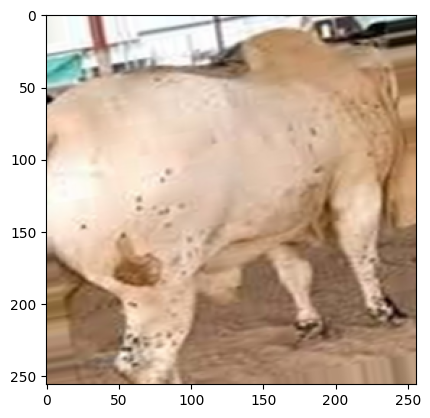

In [36]:

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


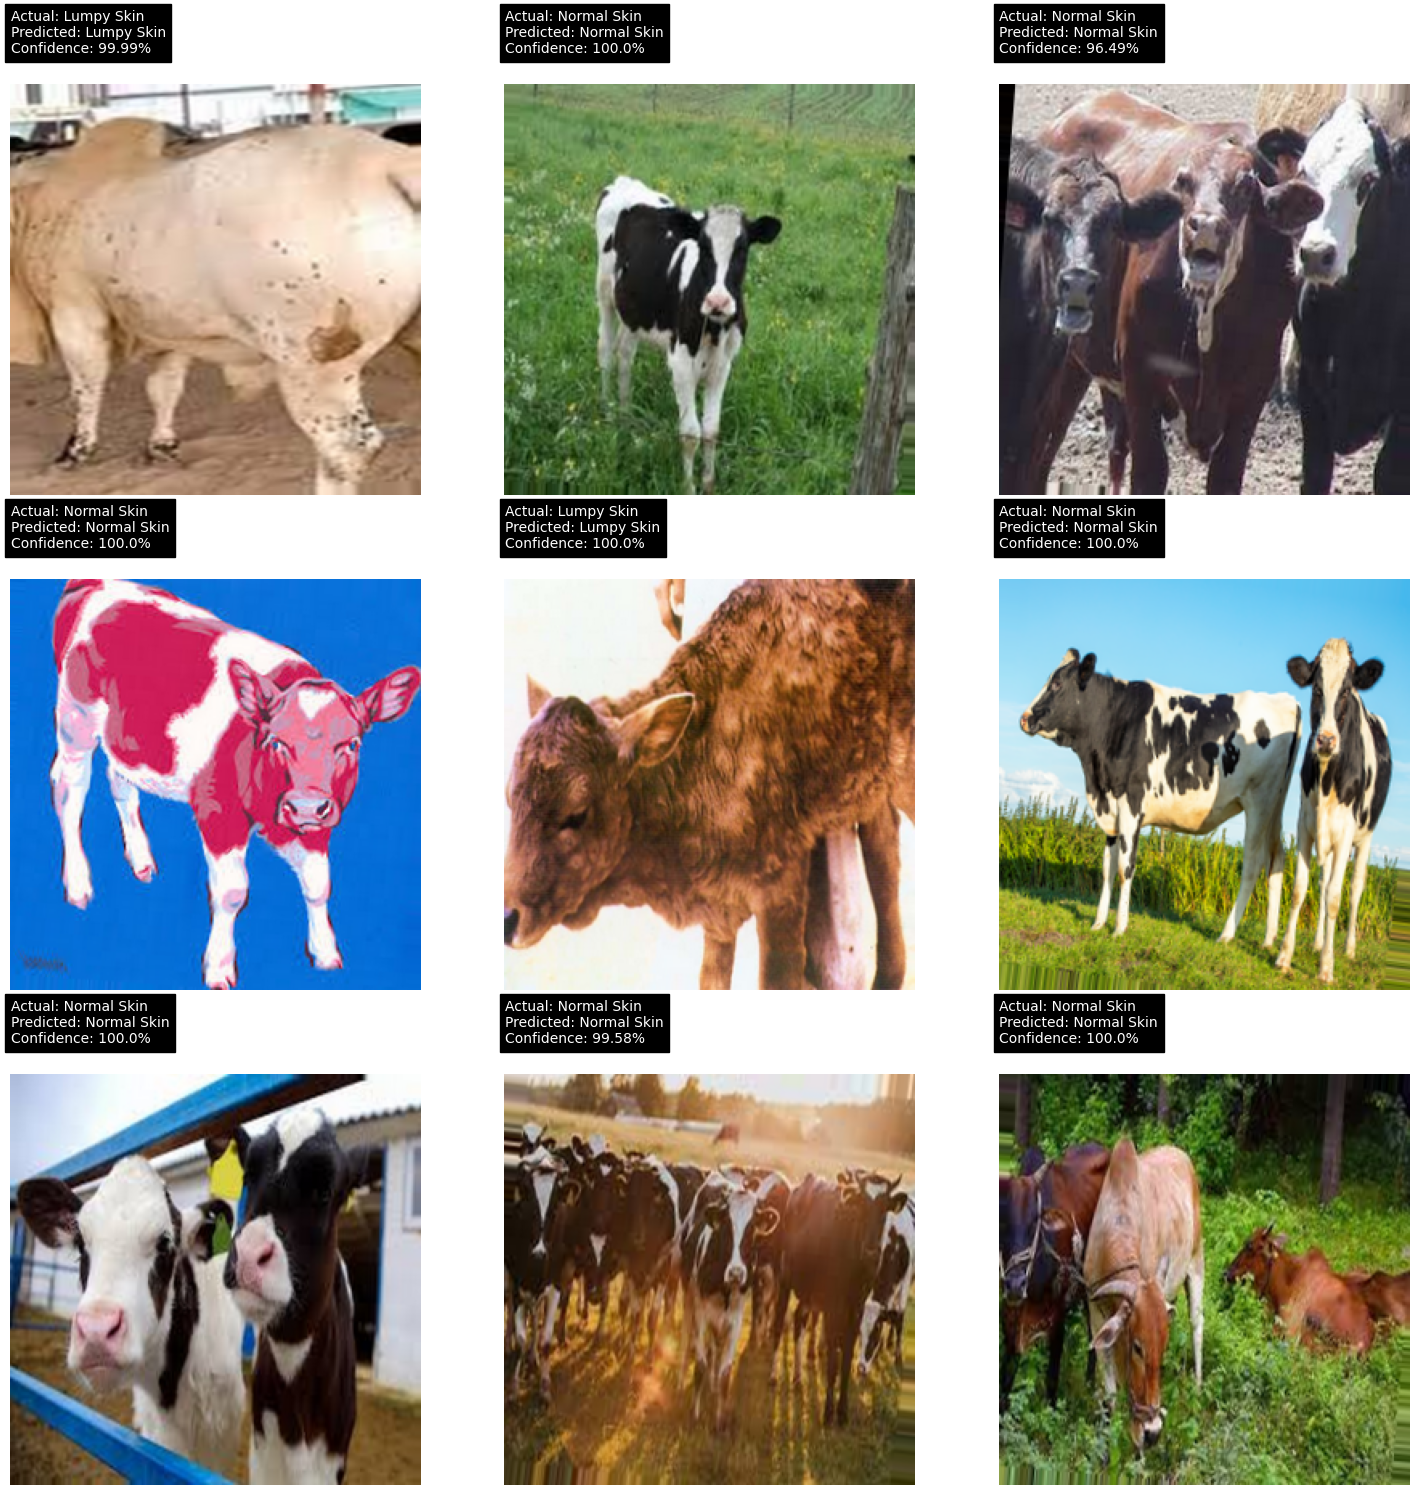

In [41]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(min(9, len(images))):  # تحقق من أن عدد الصور لا يتجاوز 9
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # قم بالتنبؤ بالصورة
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        # قم بإعداد النص المعلوماتي
        text = f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%"

        # إضافة النص إلى الصورة
        plt.text(0, -20, text, color='white', fontsize=10, ha='left', backgroundcolor='black')

    # اكتمل العرض للصور، فقط استمر إذا كانت هناك مزيد من الصور للعرض
    break

plt.tight_layout()  # ضبط التخطيط
plt.show()  # عرض الشكل



In [42]:
model.save('/content/drive/MyDrive/Data/lumpy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
